# Customer Churn

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('customer-churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#checking the the value count for different columns

df['customerID'].value_counts()

7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64

In [9]:
# Dropping the column

df.drop(['customerID'],axis=1,inplace=True)

In [10]:
df.shape

(7043, 20)

In [11]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [12]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [14]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [15]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [16]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [17]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [18]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [19]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [20]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [21]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [22]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [23]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [24]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [25]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [26]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [27]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [28]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [29]:
df['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [30]:
df['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

In [31]:
df['TotalCharges'].isnull().sum()

0

In [32]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [33]:
df.drop('TotalCharges',axis=1,inplace=True)

In [34]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,Yes


In [35]:
df.shape

(7043, 19)

In [36]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='Churn', ylabel='count'>

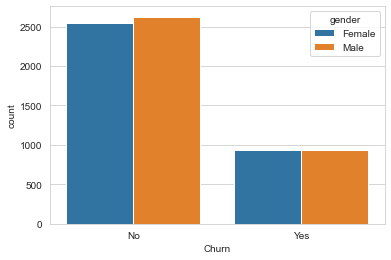

In [39]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='gender',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

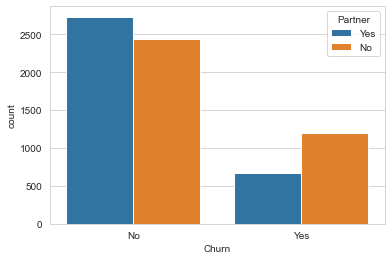

In [41]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Partner',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

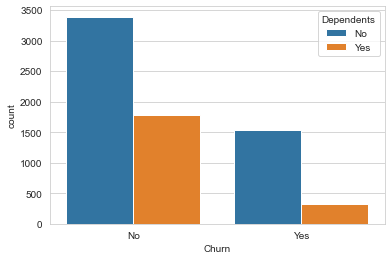

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Dependents',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

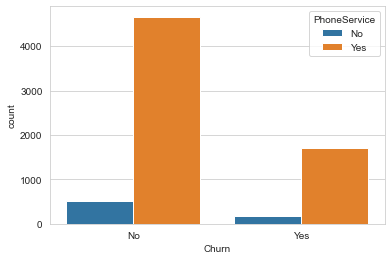

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PhoneService',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

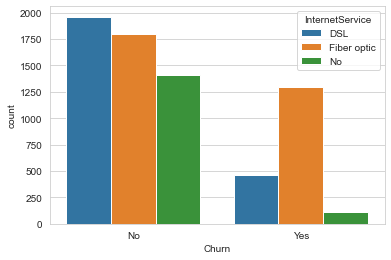

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='InternetService',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

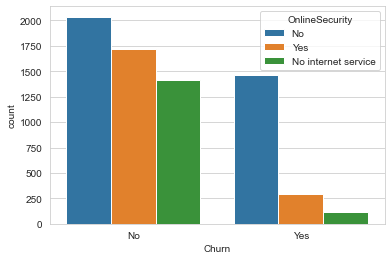

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='OnlineSecurity',data=df)

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

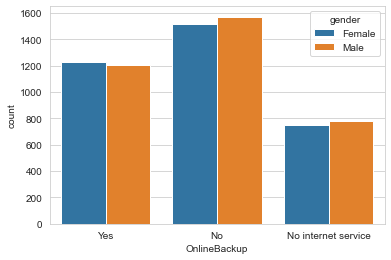

In [46]:
sns.set_style('whitegrid')
sns.countplot(x='OnlineBackup',hue='gender',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

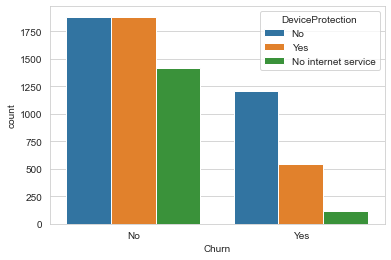

In [47]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='DeviceProtection',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

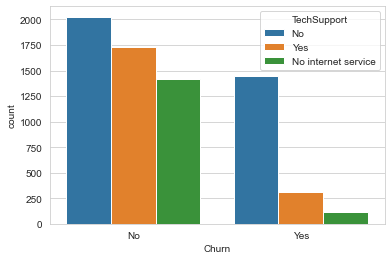

In [48]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='TechSupport',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

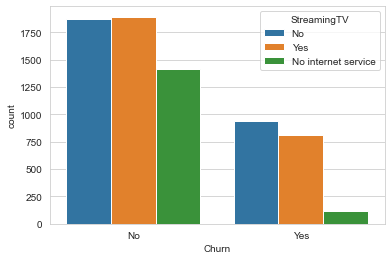

In [49]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='StreamingTV',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

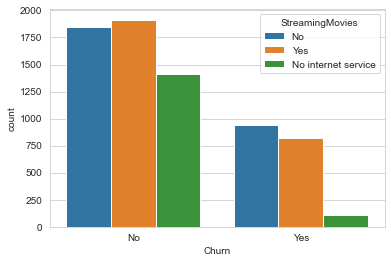

In [50]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='StreamingMovies',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

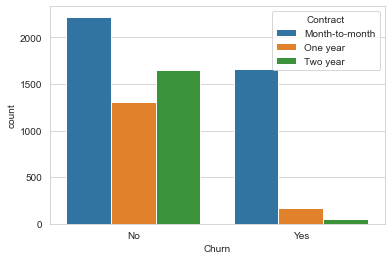

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='Contract',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

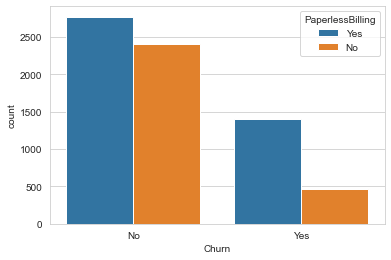

In [52]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PaperlessBilling',data=df)

<AxesSubplot:xlabel='Churn', ylabel='count'>

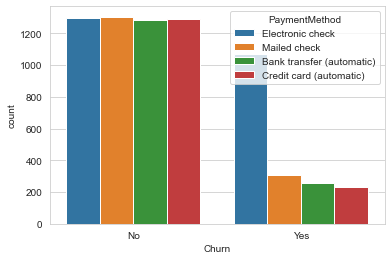

In [53]:
sns.set_style('whitegrid')
sns.countplot(x='Churn',hue='PaymentMethod',data=df)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

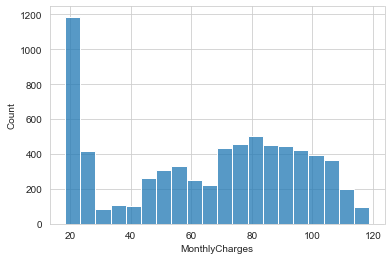

In [54]:
sns.histplot(df['MonthlyCharges'],bins=20)

In [56]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

<AxesSubplot:xlabel='tenure', ylabel='Count'>

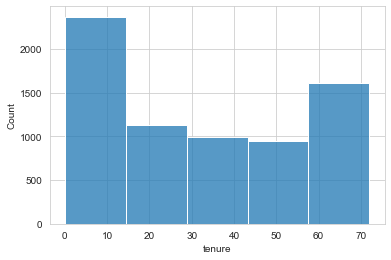

In [57]:
sns.histplot(df['tenure'],bins=5)

{'bodies': [<matplotlib.collections.PolyCollection at 0x190b3bde220>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x190b3bdebe0>,
 'cmins': <matplotlib.collections.LineCollection at 0x190b3c1af70>,
 'cbars': <matplotlib.collections.LineCollection at 0x190b3c312e0>}

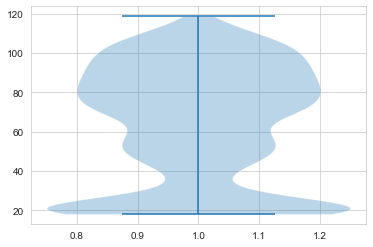

In [58]:
plt.violinplot(df['MonthlyCharges'])

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
le=LabelEncoder()

In [61]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
Churn                object
dtype: object

In [62]:
df['gender']=le.fit_transform(df['gender'])

In [63]:
df['Partner']=le.fit_transform(df['Partner'])

In [64]:
df['Dependents']=le.fit_transform(df['Dependents'])

In [ ]:
df['gender']=le.fit_transform(df['gender'])

In [65]:
df['PhoneService']=le.fit_transform(df['PhoneService'])

In [66]:
df['MultipleLines']=le.fit_transform(df['MultipleLines'])

In [67]:
df['InternetService']=le.fit_transform(df['InternetService'])

In [69]:
df['OnlineSecurity']=le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=le.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=le.fit_transform(df['DeviceProtection'])
df['TechSupport']=le.fit_transform(df['TechSupport'])
df['StreamingTV']=le.fit_transform(df['StreamingTV'])
df['StreamingMovies']=le.fit_transform(df['StreamingMovies'])
df['Contract']=le.fit_transform(df['Contract'])
df['PaperlessBilling']=le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=le.fit_transform(df['PaymentMethod'])
df['Churn']=le.fit_transform(df['Churn'])

In [70]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
Churn                 int32
dtype: object

In [72]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [73]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn'],
      dtype='object')

AttributeError: module 'matplotlib.pyplot' has no attribute 'subplot_adjust'

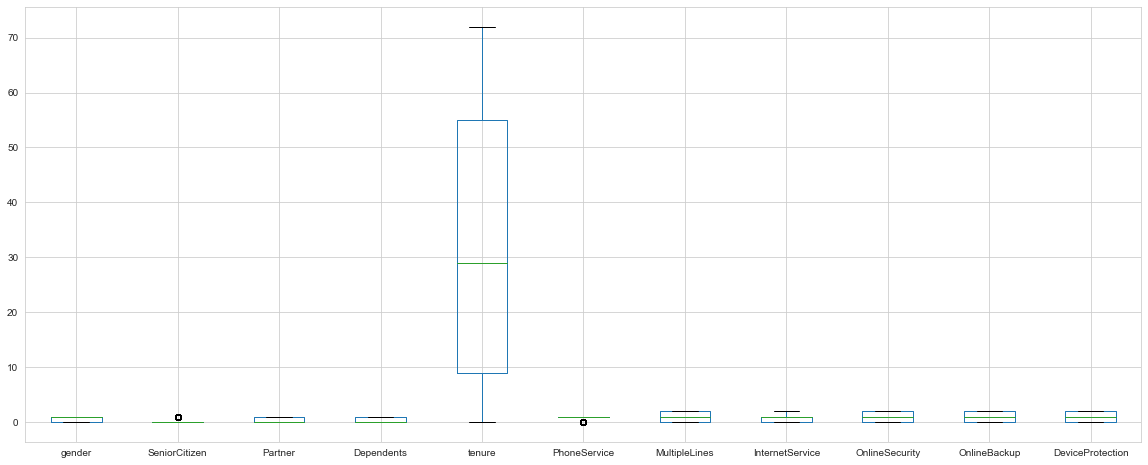

In [74]:
df.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplot_adjust(bottom=0.25)
plt.show()

<AxesSubplot:>

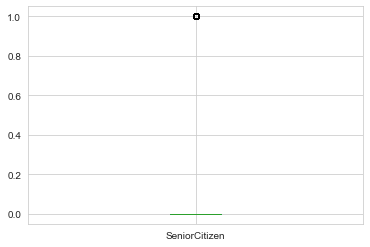

In [76]:
df['SeniorCitizen'].plot.box()

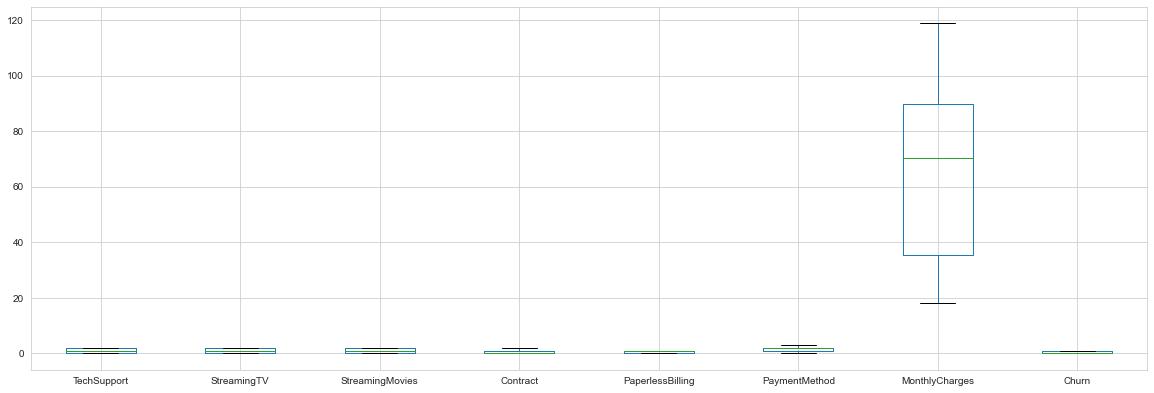

In [77]:
df.iloc[:,11:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [79]:
#checking the correlation
df_cor=df.corr()
df_cor

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,-0.195525


<AxesSubplot:>

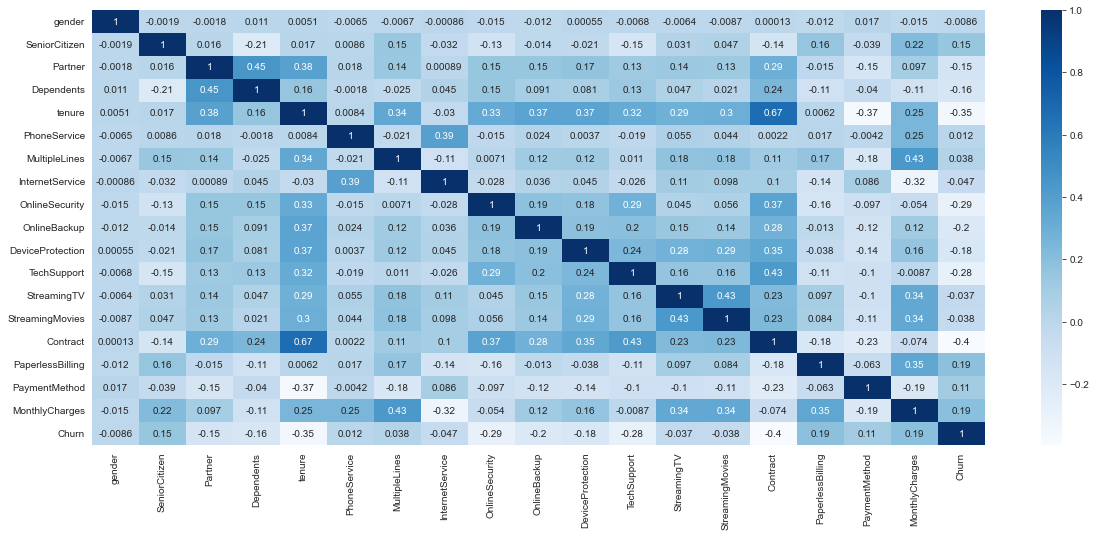

In [80]:
plt.figure(figsize=[20,8])
sns.heatmap(df_cor,cmap='Blues',annot=True)

In [81]:
corr_matrix=df.corr()
corr_matrix['Churn'].sort_values(ascending=False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

In [82]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [83]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40


In [84]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [85]:
x.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
dtype: float64

<AxesSubplot:xlabel='gender', ylabel='Density'>

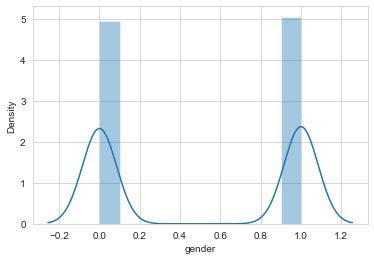

In [86]:
sns.distplot(df['gender'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

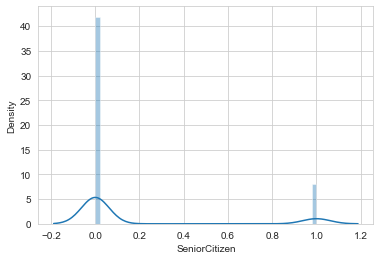

In [87]:
sns.distplot(x['SeniorCitizen'])

<AxesSubplot:xlabel='Partner', ylabel='Density'>

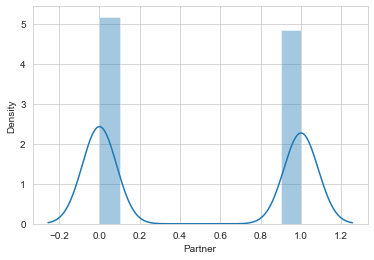

In [88]:
sns.distplot(df['Partner'])

In [89]:
from sklearn.preprocessing import MinMaxScaler

In [90]:
Mn=MinMaxScaler()

In [92]:
X=Mn.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)

In [93]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.354229
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.5,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.5,0.0,0.000000,0.239303
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.521891
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0.0,1.0,1.0,0.333333,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.5,1.0,1.000000,0.662189
7039,0.0,0.0,1.0,1.0,1.000000,1.0,1.0,0.5,0.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,0.333333,0.845274
7040,0.0,0.0,1.0,1.0,0.152778,0.0,0.5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.112935
7041,1.0,1.0,1.0,0.0,0.055556,1.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.000000,0.558706


In [94]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [95]:
X_train.shape

(4930, 18)

In [96]:
X_test.shape

(2113, 18)

In [97]:
y_train.shape

(4930,)

In [108]:
y_test.shape

(2113,)

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[ 0.96805559, -0.43683092,  1.0300664 , ...,  0.84122233,
         0.40398861,  0.19592677],
       [ 0.96805559, -0.43683092, -0.9708112 , ...,  0.84122233,
         0.40398861,  0.52275463],
       [ 0.96805559, -0.43683092, -0.9708112 , ..., -1.18874638,
        -0.53370623, -1.50955058],
       ...,
       [ 0.96805559, -0.43683092,  1.0300664 , ...,  0.84122233,
         0.40398861, -1.44816666],
       [ 0.96805559,  2.28921522, -0.9708112 , ...,  0.84122233,
         0.40398861,  1.14986595],
       [ 0.96805559, -0.43683092, -0.9708112 , ..., -1.18874638,
        -0.53370623, -1.49296033]])

In [114]:
X_test = scaler.fit_transform(X_test)
X_test

array([[-0.95691405, -0.4470866 ,  1.04502594, ...,  0.80351642,
         0.38598698, -1.33078162],
       [ 1.04502594, -0.4470866 , -0.95691405, ...,  0.80351642,
        -1.48035282, -1.31576667],
       [-0.95691405, -0.4470866 ,  1.04502594, ..., -1.24452965,
         1.31915689, -1.51262936],
       ...,
       [ 1.04502594, -0.4470866 ,  1.04502594, ..., -1.24452965,
        -1.48035282, -0.13959554],
       [ 1.04502594, -0.4470866 , -0.95691405, ...,  0.80351642,
        -0.54718292,  0.86807449],
       [ 1.04502594, -0.4470866 ,  1.04502594, ...,  0.80351642,
         0.38598698, -0.45324117]])

# Decision Tree

In [116]:
## Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1539
           1       0.74      0.33      0.45       574

    accuracy                           0.79      2113
   macro avg       0.77      0.64      0.66      2113
weighted avg       0.78      0.79      0.75      2113



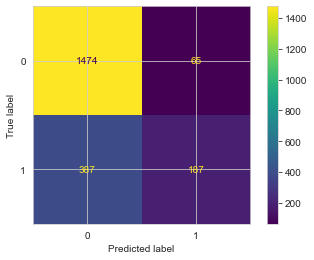

In [117]:
clfd = DecisionTreeClassifier(random_state=0, max_depth=4, min_samples_split=10)
clfd.fit(X_train, y_train)

pd = clfd.predict(X_test)
print(classification_report(y_test, pd))
plot_confusion_matrix(clfd, X_test, y_test) 

# Random Forest

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.67      0.45      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.68      0.70      2113
weighted avg       0.78      0.79      0.78      2113



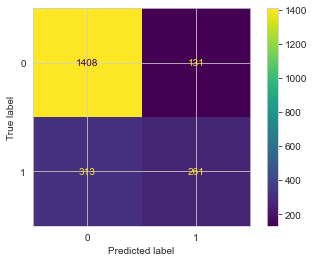

In [118]:
clfr = RandomForestClassifier(n_estimators=100, random_state=0)
clfr.fit(X_train, y_train)

pr = clfr.predict(X_test)
print(classification_report(y_test, pr))
plot_confusion_matrix(clfr, X_test, y_test)

# Gradient Booster

In [120]:
from sklearn.ensemble import GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1539
           1       0.69      0.49      0.57       574

    accuracy                           0.80      2113
   macro avg       0.76      0.70      0.72      2113
weighted avg       0.79      0.80      0.79      2113



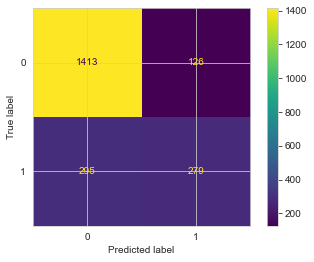

In [121]:
clfg = GradientBoostingClassifier(n_estimators=200, max_depth=2, random_state=0)
clfg.fit(X_train, y_train)

pg = clfg.predict(X_test)
print(classification_report(y_test, pg))
plot_confusion_matrix(clfg, X_test, y_test)

# KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1539
           1       0.54      0.48      0.51       574

    accuracy                           0.75      2113
   macro avg       0.68      0.67      0.67      2113
weighted avg       0.74      0.75      0.74      2113



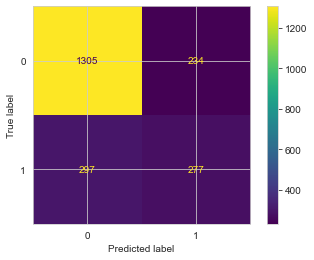

In [124]:
clfk = KNeighborsClassifier(n_neighbors=5, weights='distance')
clfk.fit(X_train, y_train)

pk = clfk.predict(X_test)
print(classification_report(y_test, pk))
plot_confusion_matrix(clfk, X_test, y_test) 

# AUC ROC

In [125]:
## Comparision of Performance of all Algorithms
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [126]:
p1 = clfd.predict_proba(X_test)
p2 = clfr.predict_proba(X_test)
p3 = clfg.predict_proba(X_test)
p4 = clfk.predict_proba(X_test)

In [127]:
# auc scores
auc_score1 = roc_auc_score(y_test, p1[:,1])
auc_score2 = roc_auc_score(y_test, p2[:,1])
auc_score3 = roc_auc_score(y_test, p3[:,1])
auc_score4 = roc_auc_score(y_test, p4[:,1])

print(auc_score1, auc_score2, auc_score3, auc_score4)

0.8306646245242738 0.823234124154107 0.853121964803608 0.7593266137339736


In [128]:
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, p1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, p2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, p3[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, p4[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

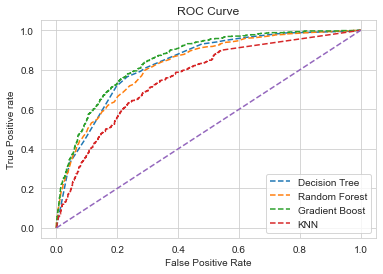

In [129]:
plt.plot(fpr1, tpr1, linestyle='--', label='Decision Tree')
plt.plot(fpr2, tpr2, linestyle='--', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--', label='Gradient Boost')
plt.plot(fpr4, tpr4, linestyle='--', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')